# Manufactured Solution

In [1]:
from __future__ import print_function
import sympy as sym
x, y, t = sym.symbols('x[0], x[1], t')
b = 1 + x**2 + 2*y**2

f = - sym.diff(sym.diff(b,x),x) - sym.diff(sym.diff(b,y),y) 
f = sym.simplify(f)

u_code = sym.printing.ccode(b)
f_code = sym.printing.ccode(f)

print(u_code)
print(f_code)

pow(x[0], 2) + 2*pow(x[1], 2) + 1
-6


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dolfin import *

In [3]:
def solver(f, u_D, Nx, Ny, degree=1):
    # Create mesh and define function space
    mesh = UnitSquareMesh(Nx, Ny)
    V = FunctionSpace(mesh, 'P', degree)

    def boundary(x, on_boundary):
        return on_boundary

    bc = DirichletBC(V, u_D, boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)

    # Compute error in L2 norm
    error_L2 = errornorm(u_D, u, 'L2')

    # Compute maximum error at vertices
    vertex_values_u_D = u_D.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)

    error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

    # Print errors
    print('error_L2  =', error_L2)
    print('error_max =', error_max)
    
    return u


In [4]:
f = Expression(f_code, degree=1)
u_D = Expression(u_code, degree=2)

u = solver(f,u_D,16,16,1)


error_L2  = 0.00205877451834
error_max = 5.77315972805e-15


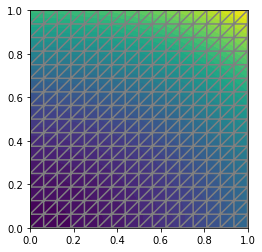

In [6]:
plot(u)
plot(u.function_space().mesh())

In [9]:
from boxfield import *

ImportError: No module named boxfield